<a href="https://colab.research.google.com/github/npipal/NHL-Attendance/blob/main/Data_Visualization_ExerciseNick_Pipal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization Exercise

- Nick Pipal
- 02/15/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
filename = '/content/NHL Attendance.xlsx'
df = pd.read_excel(filename)
df.head(10)

,SEASON,RANK,TEAM,HOME GAMES,HOME ATTENDANCE,ROAD GAMES,ROAD ATTENDANCE,TOTAL GAMES,TOTAL ATTENDANCE
0,2017-18,1,Chicago,41,887794,41,723773,82,1611567
1,2017-18,2,Montreal,41,873283,41,733736,82,1607019
2,2017-18,3,Philadelphia,41,800214,41,702781,82,1502995
3,2017-18,4,Detroit,41,800115,41,717295,82,1517410
4,2017-18,5,Toronto,41,786677,41,751940,82,1538617
5,2017-18,6,Tampa Bay,41,782772,41,701674,82,1484446
6,2017-18,7,Minnesota,41,780501,41,722461,82,1502962
7,2017-18,8,Calgary,41,775105,41,700854,82,1475959
8,2017-18,9,Washington,41,769756,41,701059,82,1470815
9,2017-18,10,Pittsburgh,41,761764,41,732793,82,1494557


## Looking for NAN Values

In [ ]:
df.isna().sum()

SEASON              0
RANK                0
TEAM                0
HOME GAMES          0
HOME ATTENDANCE     0
ROAD GAMES          0
ROAD ATTENDANCE     0
TOTAL GAMES         0
TOTAL ATTENDANCE    0
dtype: int64

## Unique Values

In [ ]:
df.nunique()

SEASON               17
RANK                 31
TEAM                 31
HOME GAMES            4
HOME ATTENDANCE     466
ROAD GAMES            4
ROAD ATTENDANCE     467
TOTAL GAMES           5
TOTAL ATTENDANCE    511
dtype: int64

## Explore the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SEASON            511 non-null    object
 1   RANK              511 non-null    int64 
 2   TEAM              511 non-null    object
 3   HOME GAMES        511 non-null    int64 
 4   HOME ATTENDANCE   511 non-null    int64 
 5   ROAD GAMES        511 non-null    int64 
 6   ROAD ATTENDANCE   511 non-null    int64 
 7   TOTAL GAMES       511 non-null    int64 
 8   TOTAL ATTENDANCE  511 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 36.1+ KB


##Identify and address any duplicate values

In [ ]:
df.duplicated().sum()

0

## Filtering Data for Home and Road Attendance by Team

In [ ]:
groupby_TEAM = df.groupby('TEAM').mean()

## Creating Graph

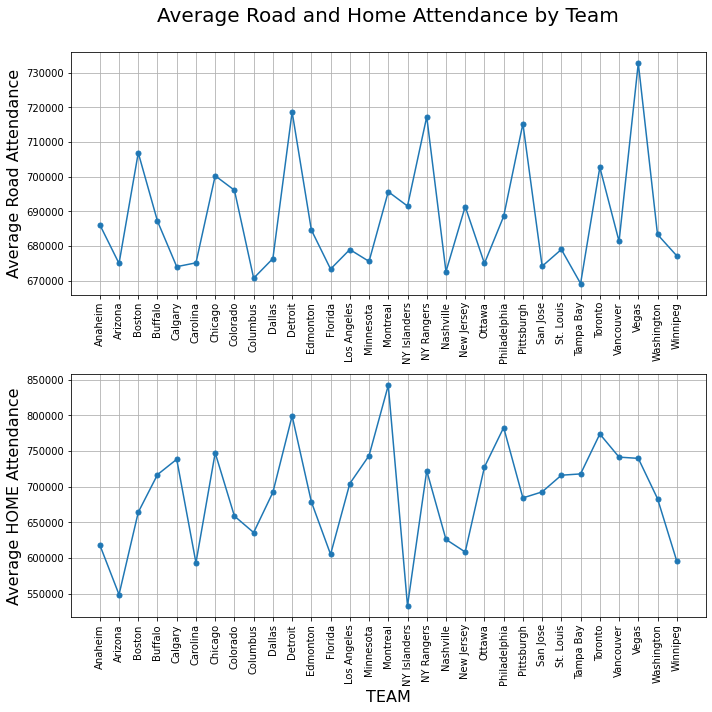

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
axes[0].plot(groupby_TEAM.index, groupby_TEAM['ROAD ATTENDANCE'], marker = '.', markersize = 10)
axes[0].set_title('Average Road and Home Attendance by Team', fontsize=20, y=1.1)
axes[0].set_ylabel('Average Road Attendance', fontsize=16)
axes[0].set_xlabel("", fontsize=16)
axes[0].set_xticklabels(groupby_TEAM.index, rotation = 90)

axes[1].plot(groupby_TEAM.index, groupby_TEAM['HOME ATTENDANCE'], marker = '.', markersize = 10)
axes[1].set_ylabel('Average HOME Attendance', fontsize=16)
axes[1].set_xlabel('TEAM', fontsize=16)
axes[1].set_xticklabels(groupby_TEAM.index, rotation = 90)

[ax.grid() for ax in axes];
plt.tight_layout()
plt.show()